In [1]:
import warnings
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from brain_decoding.config.file_path import RESULT_PATH
from brain_decoding.utils.analysis import (
    prediction_curve, correlation_heatmap, smooth_columns, combine_continuous_scores, stage_box_plot, read_sleep_score,
    correlation_heatmap_by_stage, multi_facet_correlation_heatmap, load_prediction, PREDICTION_FS, CONCEPT_LABELS as labels
)
from brain_decoding.utils.burst_analysis import ActivationBurstAnalysis
# Suppress all UserWarning messages
warnings.filterwarnings('ignore', category=UserWarning)

activation_path = os.path.join(
    RESULT_PATH, 
    '8concepts/562_None_multi-vit_test_optimalX_CARX_2024-10-23_16-09-32/memory/prediction/epoch40_test_sleep_3_results.npy'
)

sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/562/EXP6_Movie24&562_firstpass.csv'

file_path = os.path.dirname(activation_path)

predictions = load_prediction(activation_path)
sleep_score = read_sleep_score(sleep_score_file)
sleep_score.head(5)

shape of predictions: (127791, 8), duration: 8.874375 hours
shape of sleep_score: (1065, 1), duration: 8.875 hours
shape of sleep_score after merge: (55, 2)


,Score,start_index
0,Wake/REM,0
1,SWS,18000
2,Wake/REM,18120
3,SWS,18840
4,Wake/REM,33840


In [5]:
burst_analysis = ActivationBurstAnalysis(predictions, labels, PREDICTION_FS)
burst_analysis.threshold = .6
burst_analysis.min_burst_duration = 1
burst_analysis.window_size = 10 # in seconds
burst_rate = burst_analysis.sliding_window_analysis(burst_analysis.calculate_burst_rate)

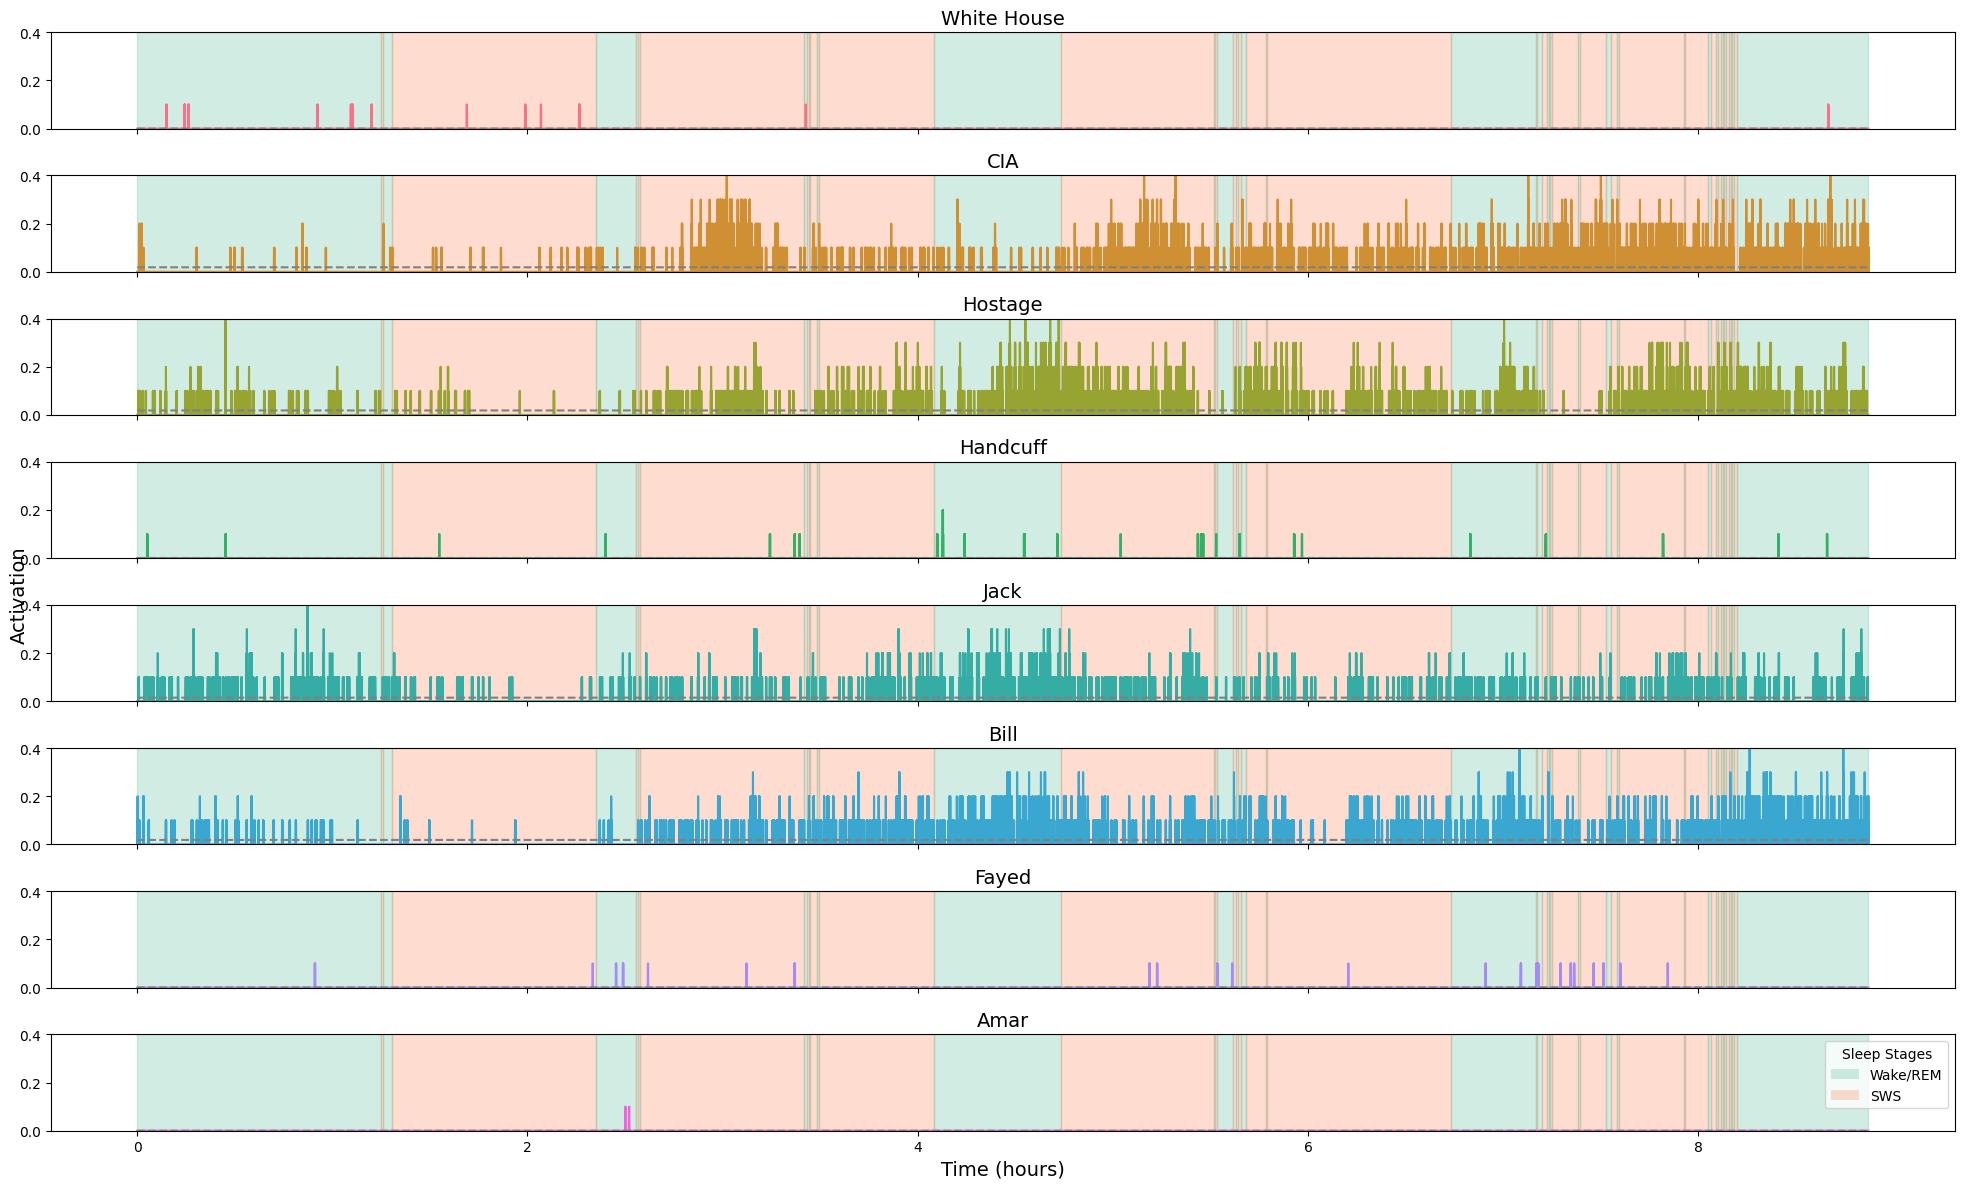

In [6]:
result_path = os.path.join(file_path, 'epoch40_burst_rate.png')
prediction_curve(burst_rate, sleep_score, labels, result_path)